In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\vamsi\\Downloads\\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA part:

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.shape

(10000, 14)

# Drop unwanted features:

In [6]:
df.drop('RowNumber',inplace=True,axis=1)

In [7]:
df.drop('CustomerId',inplace=True,axis=1)

In [8]:
df.drop('Surname',inplace=True,axis=1)

In [9]:
df.shape

(10000, 11)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
x=df.iloc[:,0:10]
y=df.iloc[:,10]

In [12]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

# Converting Geography,Gender into numerical :

In [13]:
geography=pd.get_dummies(x['Geography'],drop_first=True)

In [14]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [15]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [16]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [17]:
x=x.drop(['Geography', 'Gender'],axis=1)

# Concate the both Geography,Gender columns:

In [18]:
x=pd.concat([x,geography,gender],axis=1)

In [19]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# Train the Data:

In [20]:
from sklearn.model_selection import train_test_split

# Training data:80% and Testing data:20%

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# LinearRegression

In [22]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
mylog=LinearRegression()
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mylog.fit(x_train,y_train)

LinearRegression()

In [24]:
print(mylog.intercept_)

-0.0549232935154034


In [25]:
print(mylog.coef_)

[-1.02286880e-04  1.10482472e-02 -3.66839519e-03  2.82465304e-07
 -2.24965075e-02 -5.91083735e-03 -1.36808067e-01  7.41555987e-08
  1.34944401e-01  1.43275499e-02 -7.69640316e-02]


In [26]:
pred=mylog.predict(x_test)

In [27]:
pred

array([0.26241452, 0.33639512, 0.18921297, ..., 0.22140128, 0.17337934,
       0.26843589])

# mean_squared_error, r2_score:

In [28]:
rmse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

In [29]:
print(r2)

0.15119911409205455


In [30]:
print(rmse)

0.13707603806859625


In [32]:
mylog.score(x_train,y_train)

0.15014657823317634

# Plot the results:

Text(0.5, 1.0, 'Actual vs. predicted')

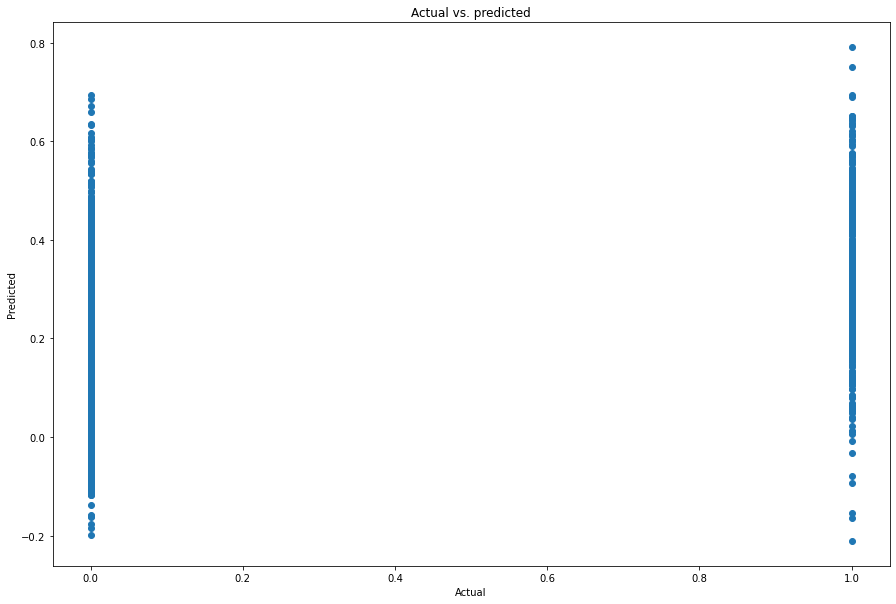

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. predicted')


# Predicted values:

In [36]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': pred,'Difference':y_test-pred})
data

,Actual,Predicted,Difference
9394,0,0.262415,-0.262415
898,1,0.336395,0.663605
2398,0,0.189213,-0.189213
5906,0,0.142170,-0.142170
2343,0,0.200734,-0.200734
...,...,...,...
1037,0,-0.031655,0.031655
2899,0,0.200490,-0.200490
9549,0,0.221401,-0.221401
2740,0,0.173379,-0.173379
